In [63]:
from opt.mc_sim import *
import time
from common.variables import *

In [64]:
import pickle as pkl
from opt.eval_policy import *

# filename = "output/msource_value_dic_07-01-2022-19-47-26.pkl"
# msource_value_dic_07-01-2022-12-11-33

filename = "output/msource_value_dic_07-02-2022-06-43-07.pkl"

with open(filename, 'rb') as f:
    output_obj = pkl.load(f)

value_dic = output_obj["state_value_dic"]
model_params = output_obj["model_params"]
sourcingEnv = output_obj["mdp_env"]

In [65]:
# output_obj['approx_di_cost'] 

In [66]:
output_obj

{'state_value_dic': {'[-1, 0, 0, 1, 1]': (-2623.9737453654902, 39),
  '[0, 0, 0, 0, 1]': (-2581.0373524785605, 336),
  '[0, 0, 0, 1, 0]': (-38.19429526301764, 179),
  '[-1, 0, 1, 1, 1]': (-67.51329682878006, 53),
  '[0, 0, 1, 1, 1]': (-3396.8451731849773, 56),
  '[0, 0, 1, 0, 1]': (-39.40648216368029, 576),
  '[0, 0, 1, 1, 0]': (-36.08476107526882, 36),
  '[-1, 0, 2, 1, 1]': (-2756.691757484174, 51),
  '[0, 0, 2, 1, 1]': (-98.55599172297292, 59),
  '[0, 0, 2, 0, 1]': (-37.04112253181544, 607),
  '[0, 0, 2, 1, 0]': (-45.36, 42),
  '[-1, 0, 3, 1, 1]': (-1373.9558944645873, 51),
  '[0, 0, 3, 1, 1]': (-47.14627815542434, 55),
  '[0, 0, 3, 0, 1]': (-42.844231151264474, 638),
  '[0, 0, 3, 1, 0]': (-33.59818279569892, 43),
  '[-1, 0, 4, 1, 1]': (-3413.723376052524, 53),
  '[0, 0, 4, 1, 1]': (-36.592660430107536, 54),
  '[0, 0, 4, 0, 1]': (-35.540409055495914, 637),
  '[0, 0, 4, 1, 0]': (-37.35202150537634, 43),
  '[-1, 0, 5, 1, 1]': (-51.5315301992621, 64),
  '[0, 0, 5, 1, 1]': (-973.96316449

In [67]:
# output_obj['adp_cost']

In [68]:
sourcingEnv2 = SourcingEnv(
        lambda_arrival = LAMBDA, # or 10
        procurement_cost_vec = np.array([1, 3]),
        supplier_lead_times_vec = np.array([0.8, 0.5]),
        on_times = np.array([1, 1]), 
        off_times = np.array([np.Inf, np.Inf]))

In [69]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 30,
  'nested_mc_iters': 31,
  'mc_episodes': 29,
  'max_steps': 38,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 0,
  'big_s': 1,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 10,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [45, 5],
  'supplier_lead_times_vec': [0.0364, 0.4],
  'on_times': [1, 1],
  'off_times': 'no_disrup'},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 2,
  'sub_nested_mc_iter': 2},
 'dual_index': {'di_safety_factor': 5, 'delta_cand_range': 20},
 'git_commit': '111729923ac799295dcc8b923bbc46e0c937389e',
 'branch_name': 'larkin/conf-refac'}

In [70]:
# best_small_s, best_big_s, best_val = find_opt_ss_policy_via_mc(sourcingEnv, periods = 20, nested_mc_iters = 50)
# best (s, S) policy found by MC:: (2, 5)

In [71]:
# model_params['branch_name'], model_params['git_commit']

In [72]:
# sourcingEnv = SourcingEnv(
#         lambda_arrival = 8, # or 10
#         procurement_cost_vec = np.array([3, 1, 2]),
#         supplier_lead_times_vec = np.array([0.8, 0.5, 1.0]),
#         on_times = np.array([1, 1, 2]), 
#         off_times = np.array([0.3, 1, 0.2]))

# Dual Sourcing
# sourcingEnv = SourcingEnv(
#         lambda_arrival = LAMBDA, # or 10
#         procurement_cost_vec = np.array([3, 1]),
#         supplier_lead_times_vec = np.array([0.8, 0.5]),
#         on_times = np.array([1, 1]), 
#         off_times = np.array([0.3, 1]))

s_custom = MState(stock_level = 0, 
    n_suppliers = N_SUPPLIERS, 
    n_backorders = np.array([0, 0]), 
    flag_on_off = np.array([1, 1]))

mc_avg_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 100,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    use_tqdm = True)

# print(mc_avg_costs)

100%|██████████| 100/100 [00:01<00:00, 79.70it/s]


In [73]:
# mc_avg_costs = mc_with_ss_policy(sourcingEnv, 
#     periods = 100,
#     nested_mc_iters = 50,
#     big_s = 5,
#     small_s = 2,
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'])

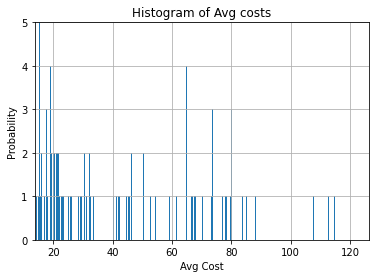

In [74]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.3
n, bins, patches = plt.hist(mc_avg_costs, bins=np.arange( np.min(mc_avg_costs), np.max(mc_avg_costs) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs), np.max(mc_avg_costs))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [75]:
print(np.mean(np.array(mc_avg_costs)))

42.82766666666667


In [76]:
print(np.median(np.array(mc_avg_costs)))

30.7


In [77]:
np.std(np.array(mc_avg_costs))

28.030990015021274

In [78]:
mc_avg_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 50,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy,
    use_tqdm = True)

100%|██████████| 50/50 [03:11<00:00,  3.83s/it]


In [79]:
print(np.mean(np.array(mc_avg_costs)))

21.112


In [80]:
print(np.median(np.array(mc_avg_costs)))

13.516666666666666


In [81]:
np.std(np.array(mc_avg_costs))

14.245036188090223

In [82]:
eval_steps = 30
mc_eval_iter = 30
eval_costs = mc_eval_policy_perf(sourcingEnv, value_dic, 
    max_steps = eval_steps, 
    mc_iters = mc_eval_iter,
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'])

avg_eval_cost = np.mean(eval_costs)

100%|██████████| 30/30 [1:25:44<00:00, 171.49s/it]


In [83]:
eval_costs_scaled = np.array(eval_costs)/eval_steps

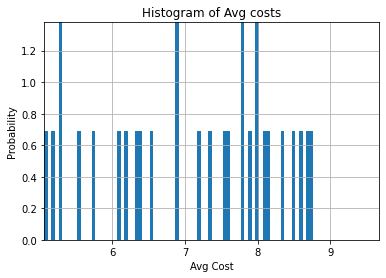

In [84]:
import numpy as np

binwidth = 0.05

n, bins, patches = plt.hist(eval_costs_scaled, bins=np.arange(min(eval_costs_scaled), max(eval_costs_scaled) + binwidth, binwidth), density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(eval_costs_scaled), np.max(eval_costs_scaled))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [85]:
np.mean(eval_costs_scaled)

7.171111111111111

In [86]:
np.median(eval_costs_scaled)

7.433333333333334

In [87]:
np.std(eval_costs_scaled)

1.2256134770235387

In [88]:
len(list(value_dic.keys()))

75295

-26.93978494623656

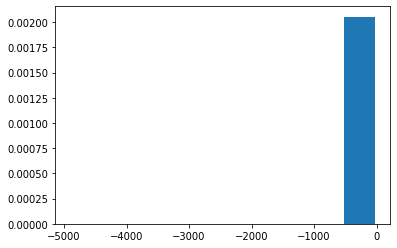

In [89]:
import numpy as np

binwidth = 0.3

state_vals = [x[0] for x in list(value_dic.values())]
state_visits = [x[1] for x in list(value_dic.values())]

n, bins, patches = plt.hist(state_vals, density = True)
np.max(state_vals)

99

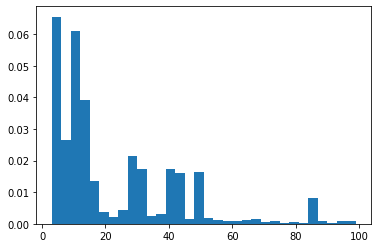

In [90]:
binwidth = 3
state_visits.remove(1)
state_visits_massage = [x for x in state_visits if 100 > x > 2]

n, bins, patches = plt.hist(state_visits_massage, bins=np.arange(min(state_visits_massage), max(state_visits_massage) + binwidth, binwidth), density = True)
np.max(state_visits_massage)

In [91]:
np.min(state_visits_massage)

3

In [92]:
len(set(state_visits))

336

In [93]:
len(state_visits_massage) - len(state_visits)

-46451

In [94]:
len(state_visits)

75294

In [95]:
len(state_vals)

75295

In [96]:

max(value_dic, key=value_dic.get)


'[28, 36, 22, 1, 1]'

In [97]:
min(value_dic, key=value_dic.get)

'[-2, 0, 6, 1, 1]'

In [98]:
value_dic_key_sorted = sorted(value_dic, key=value_dic.get, reverse=True)
value_dic_value_sorted = sorted(value_dic.values(), reverse=True)

In [99]:
value_diagnostic = list(zip(value_dic_key_sorted, value_dic_value_sorted))

In [100]:
value_diagnostic

[('[28, 36, 22, 1, 1]', (-26.93978494623656, 1)),
 ('[-4, 35, 55, 1, 1]', (-27.104301075268815, 1)),
 ('[-3, 48, 31, 1, 1]', (-27.13333333333333, 1)),
 ('[-2, 26, 6, 1, 0]', (-27.26236559139785, 11)),
 ('[20, 36, 15, 1, 1]', (-27.387096774193548, 1)),
 ('[4, 5, 3, 1, 1]', (-27.469752688172044, 43)),
 ('[-3, 5, 37, 1, 1]', (-27.478494623655912, 2)),
 ('[-4, 35, 56, 1, 1]', (-27.58279569892473, 1)),
 ('[3, 15, 2, 0, 1]', (-27.583870967741937, 13)),
 ('[-3, 32, 62, 0, 1]', (-27.679569892473115, 1)),
 ('[-3, 52, 16, 1, 1]', (-27.71505376344086, 1)),
 ('[-3, 1, 2, 1, 1]', (-27.825806451612905, 9)),
 ('[-4, 25, 58, 1, 1]', (-27.848387096774196, 1)),
 ('[4, 9, 26, 1, 0]', (-27.880645161290325, 2)),
 ('[14, 57, 4, 1, 1]', (-27.90322580645161, 1)),
 ('[-2, 56, 28, 1, 0]', (-27.903225806451612, 1)),
 ('[-2, 3, 28, 0, 1]', (-27.95412903225806, 11)),
 ('[4, 8, 49, 1, 1]', (-27.96451612903226, 1)),
 ('[-3, 35, 27, 1, 1]', (-28.035483870967735, 1)),
 ('[18, 34, 1, 1, 1]', (-28.060215053763436, 1)),


In [101]:
with open('output/diagnostic_output.txt', 'w') as f:
    for item in value_diagnostic:
        f.write("{i}\n".format(i = str(item)) )

In [102]:
item

('[-2, 0, 6, 1, 1]', (-4896.240143454574, 30))

In [103]:
len(value_dic)

75295